In [55]:
import geopandas as gpd
%matplotlib inline

In [37]:
# load 2 shapefiles, trails are line segments, park is a polygon
trails = gpd.read_file('/home/dmf/gisdata/watrailsgis/state_trails_utm10n.shp')
park = gpd.read_file('../data/rainierNP_boundary.shp')

In [39]:
# check to see if they are using the same projection
print(trails.crs)
print(park.crs)

{'init': 'epsg:32610'}
{'init': 'epsg:4269'}


In [40]:
# since they aren't, project park to the same system used by trails
park.to_crs(trails.crs, inplace=True)

In [41]:
print(trails.crs)
print(park.crs)

{'init': 'epsg:32610'}
{'init': 'epsg:32610'}


In [51]:
# check if each trail intersects the park polygon,
# and subset the trails geodataframe to return only trails that do
trails_in_park = trails[trails.intersects(park.unary_union)]

In [52]:
len(trails) # started with this many

11246

In [53]:
len(trails_in_park) # this many intersected park

125

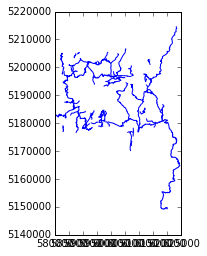

In [56]:
trails_in_park.plot()

In [57]:
trails_in_park.to_file('../data/rainier_trails.shp')